In [1]:
import os
import numpy as np
from scipy.io import loadmat
import sys
from py_packages.py_utils import *
import itertools as itools

prcs_data_dir = '/home/knight/duration_PLV/PrcsData/'


In [2]:
# Load SBJ_task list
SBJ_task_list_filename = prcs_data_dir + 'SBJ_Task_list_wHG_noDecAV.txt'
SBJ_task_list_file = open(SBJ_task_list_filename,'r')
SBJ_task_list = list()
for line in SBJ_task_list_file:
    SBJ_task_list.append(line[:-1])
SBJ_task_list_file.close()

In [3]:
# Load eInfo file for duration and response elec stats
# 1=elec#, 2=ROI, 3=Pattern, 4=Cluster, 5=idx in valid_elecs,
# 6=xLabel(e#), 7=yLabel(Patt-ROI), 8=Major divisions

sort_ID = 'Patt.ROI'

dur_elec_list = {}
resp_elec_list = {}
for SBJ_task in SBJ_task_list:
    SBJ_task_dir = get_SBJ_task_dir(SBJ_task)
    eInfo_filename = SBJ_task_dir + 'eInfo_' + sort_ID + '.mat'
    eInfo = loadmat(eInfo_filename)
    eInfo_cells = eInfo['eInfo']

    dur_elec_idx = eInfo_cells[:,2]=='D'
    dur_elec_list[SBJ_task] = eInfo_cells[dur_elec_idx,0]

    resp_elec_idx = eInfo_cells[:,2]=='R'
    resp_elec_list[SBJ_task] = eInfo_cells[resp_elec_idx,0]

# all_dur_elecs = np.vstack(dur_elec_list[s] for s in SBJ_task_list)
# all_dur_elec_tasks = np.vstack(dur_elec_task_list[s] for s in SBJ_task_list)

In [4]:
# Load RTs
RTs_SBJ_task = {s: [] for s in SBJ_task_list}
RTs_SBJ_task_Delec = {s: [] for s in SBJ_task_list}
RT_labels_SBJ_task_Delec = {s: [] for s in SBJ_task_list}
RTs_SBJ_task_Relec = {s: [] for s in SBJ_task_list}
RT_labels_SBJ_task_Relec = {s: [] for s in SBJ_task_list}

SBJ_task_list_wD = []
SBJ_task_list_wR = []
num_RTs_SBJ_task = {s: [] for s in SBJ_task_list}
num_trials = 0
for st_i, SBJ_task in enumerate(SBJ_task_list):
    SBJ_task_dir = get_SBJ_task_dir(SBJ_task)
    RT_filename = SBJ_task_dir+get_RT_filename(SBJ_task[SBJ_task.index('_')+1:])
    tmp_RT_mat = loadmat(RT_filename)
    RTs_SBJ_task[SBJ_task]=tmp_RT_mat['RTs']
    
    if dur_elec_list[SBJ_task].shape[0] > 0:
        SBJ_task_list_wD.append(SBJ_task)
        RTs_SBJ_task_Delec[SBJ_task]=np.vstack(list(itools.repeat(tmp_RT_mat['RTs'],dur_elec_list[SBJ_task].shape[0])))
#     else: RTs_SBJ_task_Delec[SBJ_task] = np.empty([0,1])
        # FORM: SBJtask, elec#, RT#
        RT_labels_SBJ_task_Delec[SBJ_task] = [(st_i,Delec_num,RT_num) for Delec_num in dur_elec_list[SBJ_task] for RT_num in range(RTs_SBJ_task[SBJ_task].shape[0])]
    
    if resp_elec_list[SBJ_task].shape[0] > 0:
        SBJ_task_list_wR.append(SBJ_task)
        RTs_SBJ_task_Relec[SBJ_task]=np.vstack(list(itools.repeat(tmp_RT_mat['RTs'],resp_elec_list[SBJ_task].shape[0])))
#     else: RTs_SBJ_task_Relec[SBJ_task] = np.empty([0,1])
        RT_labels_SBJ_task_Relec[SBJ_task] = [(st_i,Relec_num,RT_num) for Relec_num in resp_elec_list[SBJ_task] for RT_num in range(RTs_SBJ_task[SBJ_task].shape[0])]

#     print SBJ_task, RTs_SBJ_task[SBJ_task].shape, dur_elec_list[SBJ_task].shape, RTs_SBJ_task_Delec[SBJ_task].shape,\
#     resp_elec_list[SBJ_task].shape, RTs_SBJ_task_Relec[SBJ_task].shape
    
    num_RTs_SBJ_task[SBJ_task] = RTs_SBJ_task[SBJ_task].shape[0]
    num_trials+= num_RTs_SBJ_task[SBJ_task]
#     RTs_SBJ_task_elec_mult[SBJ_task] = list(itools.repeat(tmp_RT_mat['RTs'],num_RTs_SBJ_task[SBJ_task]))
#     print num_trials
    
    
all_RTs = np.vstack(RTs_SBJ_task[s] for s in SBJ_task_list)
all_RTs_Delec = np.vstack(RTs_SBJ_task_Delec[s] for s in SBJ_task_list_wD)
all_RT_labels_Delec = np.vstack(np.asarray(RT_labels_SBJ_task_Delec[s]) for s in SBJ_task_list_wD)
all_RTs_Relec = np.vstack(RTs_SBJ_task_Relec[s] for s in SBJ_task_list_wR)
all_RT_labels_Relec = np.vstack(np.asarray(RT_labels_SBJ_task_Relec[s]) for s in SBJ_task_list_wR)
print all_RTs.shape
print all_RTs_Delec.shape
print all_RT_labels_Delec.shape
print all_RTs_Relec.shape
print all_RT_labels_Relec.shape

(3028, 1)
(18856, 1)
(18856, 3)
(19841, 1)
(19841, 3)


In [5]:
# all_RTs_Delec.max()+500
all_RTs_Delec.max()+500

5636.3761105262201

In [37]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
start_i = 3
end_i = 5
print data[end_i]
print data[:end_i]
print data[start_i:end_i]

6
[1, 2, 3, 4, 5]
[4, 5]


In [39]:
bins_mean.shape

(97,)

In [6]:
all_RTs_sort_idx = np.argsort(all_RTs_Delec,axis=0)
all_RTs_sort = np.squeeze(all_RTs_Delec[all_RTs_sort_idx])
all_RTs_labels_Delec_sort = np.squeeze(all_RT_labels_Delec[all_RTs_sort_idx,:])
all_RTs_bin_assign = np.empty(all_RTs_sort.shape)
counted = np.zeros(all_RTs_sort.shape)

bins = np.arange(all_RTs_sort.min(), all_RTs_sort.max(), 50) 
bins_mean = np.empty(bins.shape)
start_i = 0
for i, b in enumerate(bins):
    if i > 0:
        start_i = end_i + 1                    # start at 1 past last good from last bin
    end_i = np.where(all_RTs_sort <= b)[0][-1] #np.where gives index of last good 
    
    all_RTs_bin_assign[start_i:end_i+1] = i    #need end_i+1 to slice past last good
        
    bins_mean[i] = all_RTs_sort[start_i:end_i+1].mean()
    counted[start_i:end_i+1]+=1
#     if all_RTs_sort[start_i:end_i].shape[0] >= 100:
    if start_i==end_i+1:
        print start_i, end_i+1, '=',  bins_mean[i]
    else:
        print start_i, '-', end_i+1, '=', all_RTs_sort[start_i:end_i+1][0], '-', all_RTs_sort[start_i:end_i+1][-1], '=', bins_mean[i]
#         print str(i) + '='+str(bins[i-1]) + ':' + str(bins[i]) + ' has ' + str(all_RTs_sort[start_i:end_i+1].shape[0]) + 'trials with mean:' , +str(bins_mean[i])

# Assign bins that were skipped to -1 to avoid confusion with first bin (0)
all_RTs_bin_assign[counted==0] = -1

0 - 6 = 300.0 - 300.0 = 300.0
6 - 133 = 300.0 - 344.0 = 326.559055118
133 - 293 = 352.0 - 399.0 = 382.1125
293 - 598 = 400.0 - 449.0 = 426.28852459
598 - 991 = 452.0 - 500.0 = 475.86259542
991 - 1536 = 501.0 - 550.0 = 521.87706422
1536 - 2110 = 550.0 - 599.0 = 573.550522648
2110 - 2796 = 600.0 - 649.0 = 623.244240642
2796 - 3633 = 651.0 - 698.694606805 = 675.833588584
3633 - 4409 = 700.0 - 749.0 = 726.046115711
4409 - 5132 = 750.0 - 799.0 = 777.105973815
5132 - 5920 = 801.0 - 849.959654462 = 825.553892507
5920 - 6677 = 850.696933329 - 900.0 = 873.178599535
6677 - 7381 = 900.217497266 - 949.779021139 = 924.577372518
7381 - 8108 = 950.843979504 - 1000.0 = 972.433130963
8108 - 8773 = 1001.67526143 - 1049.76222757 = 1026.63514287
8773 - 9456 = 1050.04894712 - 1099.24183156 = 1075.18737328
9456 - 9994 = 1100.79830917 - 1149.0 = 1127.12528671
9994 - 10421 = 1150.9742321 - 1200.0 = 1176.73244369
10421 - 11009 = 1201.60071434 - 1249.31904105 = 1222.85679647
11009 - 11625 = 1253.33311488 - 1299

/usr/local/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
matar_data = np.genfromtxt(prcs_data_dir+'matar_binning_RT_stats.csv', delimiter=',')

In [33]:
matar_data[1,:]

array([ 300.       ,  350.       ,  300.       ,  344.       ,
        132.       ,  325.3560606])

In [31]:
all_RTs_bin_assign[-10:]

array([ 94.,  94.,  96.,  96.,  96.,  96.,  -1.,  -1.,  -1.,  -1.])

In [8]:
# Save out the relevant variables as .mat
from scipy.io import savemat
out_filename = prcs_data_dir + 'all_RTs_sorted_Delec.mat'
out_dict = {'all_RTs_sorted': all_RTs_sort,
           'all_RTs_sorted_info': all_RTs_labels_Delec_sort,
           'all_RTs_sorted_bins': all_RTs_bin_assign,
           'bins': bins,
           'bin_means': bins_mean}
savemat(out_filename,out_dict)

In [9]:
all_RTs_sort_R_idx = np.argsort(all_RTs_Relec,axis=0)
all_RTs_sort_R = np.squeeze(all_RTs_Relec[all_RTs_sort_R_idx])
all_RTs_labels_R_sort = np.squeeze(all_RT_labels_Relec[all_RTs_sort_R_idx,:])
all_RTs_R_bin_assign = np.empty(all_RTs_sort_R.shape)
counted_R = np.zeros(all_RTs_sort_R.shape)

bins_R = np.arange(all_RTs_sort_R.min(), all_RTs_sort_R.max(), 50) 
bins_mean_R = np.empty(bins_R.shape)
start_i = 0
for i, b in enumerate(bins_R):
    if i > 0:
        start_i = end_i + 1                    # start at 1 past last good from last bin
    end_i = np.where(all_RTs_sort_R <= b)[0][-1] #np.where gives index of last good 
    
    all_RTs_R_bin_assign[start_i:end_i+1] = i    #need end_i+1 to slice past last good
        
    bins_mean_R[i] = all_RTs_sort_R[start_i:end_i+1].mean()
    counted_R[start_i:end_i+1]+=1
#     if all_RTs_sort[start_i:end_i].shape[0] >= 100:
    if start_i==end_i+1:
        print start_i, end_i+1, '=',  bins_mean_R[i]
    else:
        print start_i, '-', end_i+1, '=', all_RTs_sort_R[start_i:end_i+1][0], '-', all_RTs_sort_R[start_i:end_i+1][-1], '=', bins_mean_R[i]
#         print str(i) + '='+str(bins_R[i-1]) + ':' + str(bins_R[i]) + ' has ' + str(all_RTs_sort_R[start_i:end_i+1].shape[0]) + 'trials with mean:' , +str(bins_mean_R[i])

# Assign bins that were skipped to -1 to avoid confusion with first bin (0)
all_RTs_R_bin_assign[counted_R==0] = -1
print all_RTs_sort_R.shape, counted_R.sum()

0 - 10 = 300.0 - 300.0 = 300.0
10 - 192 = 300.0 - 344.0 = 326.934065934
192 - 422 = 352.0 - 399.0 = 381.860869565
422 - 781 = 400.0 - 449.0 = 424.972144847
781 - 1279 = 452.0 - 500.0 = 475.732931727
1279 - 1894 = 501.0 - 550.0 = 521.978861789
1894 - 2456 = 550.0 - 599.0 = 573.387900356
2456 - 3060 = 600.0 - 649.0 = 624.312540629
3060 - 3858 = 651.0 - 698.694606805 = 675.518807125
3858 - 4685 = 700.0 - 749.0 = 724.603992553
4685 - 5393 = 750.0 - 799.53797191 = 776.416928226
5393 - 6107 = 801.0 - 849.959654462 = 826.323200688
6107 - 6943 = 850.696933329 - 900.0 = 872.96581955
6943 - 7688 = 900.217497266 - 949.779021139 = 922.607840359
7688 - 8608 = 950.843979504 - 1000.0 = 974.414537576
8608 - 9716 = 1001.67526143 - 1049.76222757 = 1026.32135567
9716 - 10695 = 1050.04894712 - 1099.24183156 = 1074.88814471
10695 - 11637 = 1100.79830917 - 1149.0 = 1121.83605429
11637 - 12389 = 1150.85135229 - 1200.0 = 1175.10576911
12389 - 13300 = 1201.60071434 - 1249.31904105 = 1225.7516172
13300 - 14067 

In [10]:
print bins_R[-1]
print all_RTs_sort_R[-11:]
print all_RTs_sort_R[-10]==bins_R[-1]
print all_RTs_sort_R[-10]-bins_R[-1]
print all_RTs_sort_R[all_RTs_R_bin_assign==-1]

3750.0
[ 3747.21984427  3750.          3750.          3797.92824638  3797.92824638
  3797.92824638  3797.92824638  3797.92824638  3797.92824638  3797.92824638
  3797.92824638]
False
4.54747350886e-13
[ 3750.          3750.          3797.92824638  3797.92824638  3797.92824638
  3797.92824638  3797.92824638  3797.92824638  3797.92824638  3797.92824638]


In [11]:
# Save out the relevant variables as .mat
from scipy.io import savemat
out_R_filename = prcs_data_dir + 'all_RTs_sorted_Relec.mat'
out_R_dict = {'all_RTs_sorted': all_RTs_sort_R,
           'all_RTs_sorted_info': all_RTs_labels_R_sort,
           'all_RTs_sorted_bins': all_RTs_R_bin_assign,
           'bins': bins_R,
           'bin_means': bins_mean_R}
savemat(out_R_filename,out_R_dict)

## Check for Errors

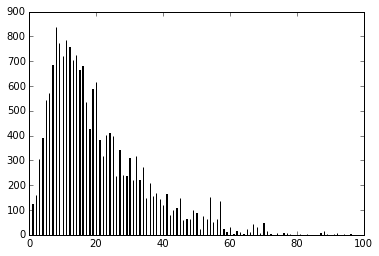

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(all_RTs_bin_assign[:,0,0],1000)
plt.show()

In [37]:
# Check why there are so many recurring RTs
# I'm wondering if the duplication of RTs by #Delecs can account for all instances of
#   RTs that are EXACTLY repeated, or if it's that SBJ_tasks have the exact same RT...
RT_list = np.squeeze(all_RTs_labels_Delec_sort)
good_cnt=0
bad_cnt=0
bad_list = []
good_list = []
rep_list=np.zeros(all_RTs_sort.shape)

uniq_RTs = np.unique(all_RTs_sort)
uniq_RT_sources = []
for i, rt in enumerate(uniq_RTs):
    idx_list = np.where(all_RTs_sort==rt)
    idx_info = [(RT_list[vidx,0],RT_list[vidx,2]) for vidx in idx_list[0]]
    if len(set(idx_info))>1:
#         print rt, '-', set(idx_info)
        uniq_RT_sources.append(set(idx_info))
        bad_cnt+=1
    else:
        good_cnt+=1
#     for idx in idx_list:
#         if RT_list[idx,0]==RT_list[idx-1,0] and RT_list[i,2]==RT_list[i-1,2]:
#     if i>0 and rt==all_RTs_sort[i-1]:
#         rep_list[i]+=1
#         if RT_list[i,0]==RT_list[i-1,0] and RT_list[i,2]==RT_list[i-1,2]:
#             good_rep+=1
#             good_list.append(i)
#         else:
#             bad_rep+=1
#             bad_list.append(i)
            
print good_cnt, bad_cnt
            

2026 149


In [33]:
# Print out the (SBJ, RT) tuples and the actual RTs to see the overlap
for ui in range(len(uniq_RT_sources)):
    tmp = list(uniq_RT_sources[ui])
    st_i1 = tmp[0][0]
    st_i2 = tmp[1][0]
    rt_i1 = tmp[0][1]
    rt_i2 = tmp[1][1]
    print tmp, RTs_SBJ_task[SBJ_task_list[st_i1]][rt_i1], RTs_SBJ_task[SBJ_task_list[st_i2]][rt_i2]
# list(uniq_RT_sources[2])[0][0]

[(11, 32), (11, 38)] [ 300.] [ 300.]
[(11, 40), (11, 12)] [ 342.] [ 342.]
[(11, 31), (10, 10)] [ 383.] [ 383.]
[(10, 71), (11, 61)] [ 384.] [ 384.]
[(22, 89), (22, 48), (22, 72)] [ 392.] [ 392.]
[(18, 71), (22, 78)] [ 404.] [ 404.]
[(22, 99), (22, 65)] [ 417.] [ 417.]
[(10, 62), (11, 68)] [ 420.] [ 420.]
[(22, 22), (18, 2)] [ 445.] [ 445.]
[(11, 65), (11, 11)] [ 452.] [ 452.]
[(18, 63), (22, 13)] [ 453.] [ 453.]
[(22, 19), (22, 50), (22, 110)] [ 464.] [ 464.]
[(22, 12), (22, 85), (22, 100)] [ 474.] [ 474.]
[(10, 6), (10, 28)] [ 479.] [ 479.]
[(2, 75), (3, 69)] [ 494.] [ 494.]
[(10, 78), (3, 99)] [ 495.] [ 495.]
[(22, 2), (22, 111)] [ 495.] [ 495.]
[(11, 47), (3, 83)] [ 496.] [ 496.]
[(10, 79), (3, 7)] [ 501.] [ 501.]
[(10, 31), (11, 70)] [ 503.] [ 503.]
[(22, 76), (22, 104), (20, 0)] [ 506.] [ 506.]
[(22, 49), (22, 26)] [ 507.] [ 507.]
[(3, 0), (22, 20), (22, 42), (22, 55)] [ 508.] [ 508.]
[(18, 93), (22, 71), (18, 66)] [ 521.] [ 521.]
[(22, 75), (22, 74), (22, 54)] [ 541.] [ 541.]
[(2

# MATAR'S ORIGINAL CODE

In [ ]:
### MATAR CODE

## all_RTs is a 19118 long vector of all the sorted reaction times for the duration electrodes. 
## alldata is a (19118, 6137) shaped array of time x trials for all the duration electrodes. Also sorted by RT.
bins = np.arange(all_RTs.min(), all_RTs.max(), 50) 
# f, ax = plt.subplots(46, 1, figsize = (10,100))
start_i = 0 
start_i_resp = 0 
new_b = 0 
for i, b in enumerate(bins):
    if i > 1:
        start_i = end_i+1
        start_i_resp = end_i_resp+1
    end_i = np.where(all_RTs <= (b+1))[-1][-1]
    end_i_resp = np.where(all_RTs_resp <= (b+1))[-1][-1] #define resp bins based on duration RTs
    
    previous_b = new_b #keep track of previous and current bin, for plot labeling
    new_b = b 
    
    if len(np.arange(start_i, end_i))<100: #skip bins with <100 trials
        continue
    
    data = alldata[start_i:end_i,:].mean(axis = 0) #calculate mean trace
    data_resp = alldata_resp[start_i_resp:end_i_resp,:].mean(axis=0)


# MY RANDOM BITS

In [5]:
print 'SBJ_Task_list    RTs   D    RT_D    R    RT_R'
print
for SBJ_task in SBJ_task_list:
    if split_SBJ_task(SBJ_task)[1]=='FaceEmo':
            print SBJ_task, RTs_SBJ_task[SBJ_task].shape, dur_elec_list[SBJ_task].shape, RTs_SBJ_task_Delec[SBJ_task].shape,\
    resp_elec_list[SBJ_task].shape, RTs_SBJ_task_Relec[SBJ_task].shape


SBJ_Task_list    RTs   D    RT_D    R    RT_R

GP15_FaceEmo (131, 1) (7,) (917, 1) (8,) (1048, 1)
GP35_FaceEmo (104, 1) (8,) (832, 1) (8,) (832, 1)
JH2_FaceEmo (113, 1) (16,) (1808, 1) (9,) (1017, 1)
JH6_FaceEmo (112, 1) (7,) (784, 1) (10,) (1120, 1)


In [51]:
import pandas as pd
SBJ_list = list(split_SBJ_task(s)[0] for s in SBJ_task_list)
task_list = list(split_SBJ_task(s)[1] for s in SBJ_task_list)
SBJ_task_array = np.vstack([np.asarray(SBJ_list),np.asarray(task_list)])
SBJ_task_df = pd.DataFrame(SBJ_task_array.T, columns=['SBJ','task'])
# SBJ_task_split
# SBJ_task_list_sorted = np.sort(SBJ_task_list)
# print SBJ_task_split
# for s in SBJ_task_list_sorted:
#     print s

In [207]:
# SBJ_task = 'CP7_DecisionAud'
# tmp = list(itools.repeat(SBJ_task,dur_elec_list[SBJ_task].shape[0]))
# tmp2 = np.hstack((tmp,dur_elec_list[SBJ_task]))
# tmp3 = np.hstack(tmp)
# tmp3

array(['CP7_DecisionAud', 'CP7_DecisionAud'], 
      dtype='|S15')

In [239]:
# print num_RTs_SBJ_task[SBJ_task]
# print tmp_RT_mat['RTs'].shape
# print len(list(itools.repeat(tmp_RT_mat['RTs'],num_RTs_SBJ_task[SBJ_task])))

216
(216, 1)
[array([[1110],
       [2147],
       [1258],
       [1197],
       [1120],
       [1096],
       [1482],
       [1563],
       [1371],
       [1262],
       [1493],
       [1472],
       [1567],
       [1567],
       [2496],
       [1139],
       [ 886],
       [1124],
       [1367],
       [1373],
       [1618],
       [1303],
       [1374],
       [1852],
       [2583],
       [1724],
       [1366],
       [ 962],
       [1080],
       [1307],
       [ 638],
       [1456],
       [1376],
       [1956],
       [ 783],
       [1375],
       [1293],
       [1226],
       [1423],
       [1985],
       [2599],
       [1652],
       [2540],
       [2131],
       [ 890],
       [2493],
       [1817],
       [1536],
       [1758],
       [ 925],
       [1099],
       [1159],
       [1048],
       [1916],
       [1758],
       [ 800],
       [ 982],
       [1284],
       [1756],
       [1979],
       [ 875],
       [1467],
       [1703],
       [1578],
       [1637],
       [110

In [236]:
cnt=0
for SBJ_task in SBJ_task_list:
    print SBJ_task, dur_elec_list[SBJ_task].shape[0], RTs_SBJ_task[SBJ_task].shape
#     SBJ_task_dir = get_SBJ_task_dir(SBJ_task)
#     RT_filename = SBJ_task_dir+get_RT_filename(SBJ_task[SBJ_task.index('_')+1:])
#     tmp_RT_mat = loadmat(RT_filename)

#     cnt+= tmp_RT_mat['RTs'].shape[0]*dur_elec_list[SBJ_task].shape[0]
# print cnt

CP7_DecisionAud 2 (125, 1)
CP9_DecisionAud 0 (264, 1)
GP15_EmoGen 17 (147, 1)
GP15_EmoRep 5 (115, 1)
GP15_FaceEmo 7 (132, 1)
GP15_FaceGen 6 (133, 1)
GP15_SelfAud 5 (82, 1)
GP15_SelfVis 8 (77, 1)
GP28_SelfAud 3 (75, 1)
GP28_SelfVis 0 (84, 1)
GP35_EmoGen 17 (91, 1)
GP35_EmoRep 10 (87, 1)
GP35_FaceEmo 8 (105, 1)
GP35_FaceGen 6 (83, 1)
JH10_EmoRep 0 (139, 1)
JH10_SelfAud 4 (61, 1)
JH17_EmoRep 0 (51, 1)
JH17_SelfAud 12 (61, 1)
JH17_SelfVis 17 (64, 1)
JH2_EmoGen 17 (63, 1)
JH2_FaceEmo 16 (115, 1)
JH2_SelfAud 9 (57, 1)
JH2_SelfVis 7 (50, 1)
JH5_EmoRep 3 (138, 1)
JH6_FaceEmo 7 (112, 1)
JH6_SelfAud 6 (72, 1)
ST1_EmoGen 4 (133, 1)
ST1_SelfAud 2 (89, 1)
ST15_EmoRep 0 (74, 1)
ST15_SelfAud 2 (89, 1)
ST27_DecisionVis 19 (418, 1)
ST32_DecisionVis 15 (275, 1)
ST4_EmoRep 6 (137, 1)
ST4_SelfAud 0 (79, 1)
ST6_EmoRep 0 (147, 1)
ST6_SelfAud 0 (43, 1)
ST6_SelfVis 0 (65, 1)
GP44_DecisionAud 15 (216, 1)
